### <b> Trabalho Final - Inteligência Computacional Aplicada (TIP7077) </b>
#### <b> Aluno: Carlos Eduardo Sousa Lima </b>
#### <b> Prof. Guilherme de Alencar Barreto </b>
***

#### <b>Questão 01 - Ajuste Polinomal OLS - Dados Aerogerador </b>

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def R2(y_true, y_pred, n, p):

    coef = 1 - (np.power(y_true-y_pred,2).sum()/np.power(y_true-y_true.mean(),2).sum())
    coef_aj = 1 - (1-coef)*((n-1)/(n-p))
    # coef_aj = 1 - ((n-1)/(n-p)) * (1-coef)
    return (coef, coef_aj)

def AIC(y_true, y_pred, n, p):
    
    AIC = n*np.log(np.power(y_true-y_pred,2).sum()) + 2*p

    return (AIC)

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

R2_k, R2aj_k, AIC_k, M_k, y_pred_k = [], [], [], [], []

for k in range(1, 10+1):

    X = input_matrix(x, order = k)

    M = np.linalg.lstsq(X,y, rcond = -1)[0]

    y_pred = np.dot(X, M)
    R2_k.append(R2(y, y_pred, X.shape[0], k)[0])
    R2aj_k.append(R2(y, y_pred, X.shape[0], k)[1])
    AIC_k.append(AIC(y, y_pred, X.shape[0], k))
    M_k.append(M)
    y_pred_k.append(y_pred)
print("R2 máximo = {:.5f} para polinomio de ordem {}".format(np.max(R2_k), np.argmax(R2_k)+1))
print("R2aj máximo = {:.5f} para polinomio de ordem {}".format(np.max(R2aj_k), np.argmax(R2aj_k)+1))
print("AIC Mínimo = {:.5f} para polinomio de ordem {}".format(np.min(AIC_k), np.argmin(AIC_k)+1))

R2 máximo = 0.97394 para polinomio de ordem 10
R2aj máximo = 0.97384 para polinomio de ordem 8
AIC Mínimo = 30140.61234 para polinomio de ordem 8


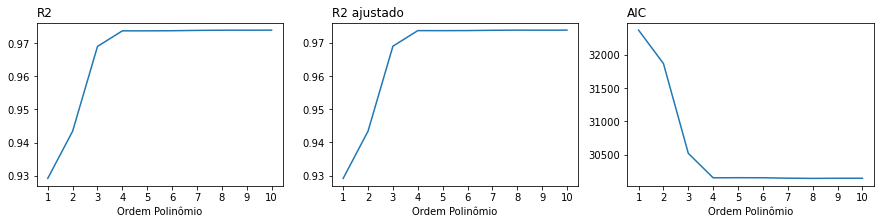

In [9]:
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].plot(range(1, 11,1),R2_k)
axs[1].plot(range(1, 11,1),R2aj_k)
axs[2].plot(range(1, 11,1),AIC_k)

axs[0].set_title("R2", loc = "left")
axs[1].set_title("R2 ajustado", loc = "left")
axs[2].set_title("AIC", loc = "left")

axs[0].set_xlabel("Ordem Polinômio")
axs[1].set_xlabel("Ordem Polinômio")
axs[2].set_xlabel("Ordem Polinômio")

axs[0].set_xticks(range(1, 10+1));
axs[1].set_xticks(range(1, 10+1));
axs[2].set_xticks(range(1, 10+1));
    

Text(0, 0.5, 'Potência Gerada (kW)')

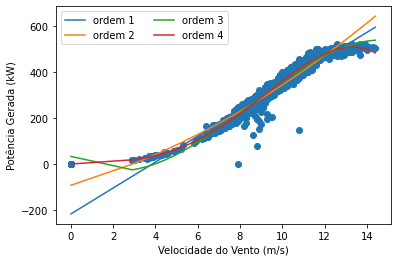

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y);
for k in range(0, 4, 1):
    ax.plot(x, y_pred_k[k], label = "ordem {}".format(k+1))
ax.legend(loc = "upper left", ncol = 2)
ax.set_xlabel("Velocidade do Vento (m/s)")
ax.set_ylabel("Potência Gerada (kW)")

In [48]:
print(M_k[4])

[-1.79826294e-01  8.16387623e+00 -3.93045532e+00  1.24622594e+00
 -5.37024702e-02 -3.75305419e-04]


#### <b>Questão 02 - Ajuste Polinomal - *Local Random Search (LRS)* - Dados Aerogerador </b>

Tempo de Simulação = 1419.193, Número de iterações = 1000, Número de Rodadas = 5


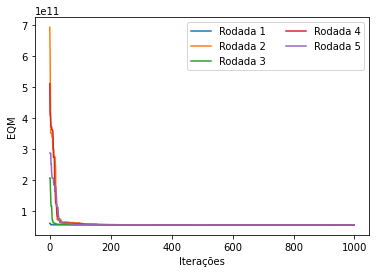

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X
    
data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

k = 4
X = input_matrix(x, order = k)

Nr = 5
Ns = 1000
M_best_r = []
FO_best_r = []

tic = time.perf_counter()
fig, ax = plt.subplots()
for r in range(Nr):

    M_best = np.random.uniform(-1, 10, size = (k+1,1))
    FO_best = np.power(y - np.dot(X, M_best), 2).sum()
    FO_s = []
    for s in range(Ns):

        M_cand = M_best + np.random.normal(loc = 0, scale = 0.5, size = (k+1,1))
        M_cand[M_cand < -1], M_cand[M_cand > 10]  = -1, 10
        y_pred = np.dot(X, M_cand)
        
        FO = np.power(y - y_pred, 2).sum()

        if FO < FO_best:
            FO_best = FO
            M_best = M_cand
        
        FO_s.append(FO_best)
    ax.plot(FO_s, label = "Rodada {}".format(r+1))
    np.savetxt("M_best_{}.csv".format(r+1), M_best, delimiter = ",")
    M_best_r.append(M_best)
    FO_best_r.append(FO_best)
toc = time.perf_counter()
ax.set_ylabel("EQM")
ax.set_xlabel("Iterações")
ax.legend(loc = "upper right", ncol = 2)

print("Tempo de Simulação = {:.3f} segundos, Número de iterações = {}, Número de Rodadas = {}".format(toc-tic, Ns, Nr))

EQM = 56302602122.075, Rodada = 1
EQM = 56306095900.709, Rodada = 2
EQM = 56321680008.369, Rodada = 3
EQM = 56358071359.542, Rodada = 4
EQM = 56299480013.336, Rodada = 5


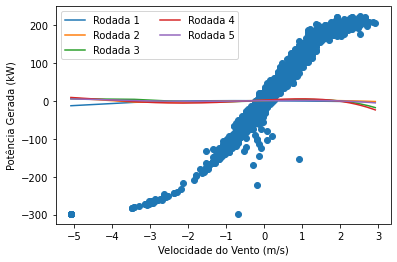

In [3]:

fig, ax = plt.subplots()
ax.scatter(x,y)
for i in range(Nr):
    ax.plot(x, np.dot(X, M_best_r[i]), label = "Rodada {}".format(i+1))
    print("EQM = {:.3f}, Rodada = {}".format(FO_best_r[i], i+1))
ax.legend(loc = "upper left", ncol = 2)
ax.set_xlabel("Velocidade do Vento (m/s)")
ax.set_ylabel("Potência Gerada (kW)");


#### <b>Questão 03 - Ajuste Polinomal - Metaheurísticas Populacionais - Dados Aerogerador </b>

##### *Particle Swarm Optimization (PSO)*

Rodada 1, Coeficientes do Melhor indivíduo:
[ 2.27131785 -1.         -1.          0.97628708 -0.05099434]
Rodada 2, Coeficientes do Melhor indivíduo:
[-1.         10.         -1.          0.67846257 -0.03263815]
Rodada 3, Coeficientes do Melhor indivíduo:
[-1.         -1.         -1.          0.988616   -0.05185406]

Tempo de Simulação = 26.289 segundos, Número de iterações = 1000, Número de Rodadas = 3


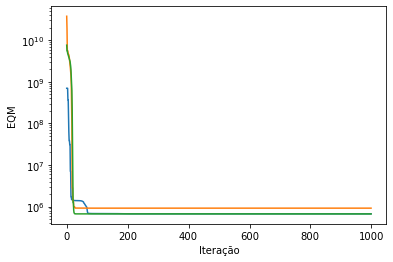

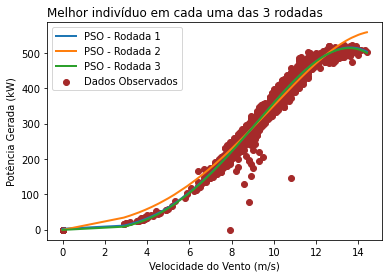

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import time

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def EQM(M, y_true, X):

    coef = np.power(y_true - np.dot(X, M), 2).sum()

    return coef

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

Ns = 1000
Nr = 3

k = 4
p = 20 #Num de partículas
w, c1, c2 = 0.4, 2.05, 2.05
l_limit, u_limit = -1, 10

X = input_matrix(x, order = k)

fig, ax = plt.subplots()
fig_b, ax_b = plt.subplots()
tic = time.perf_counter()

for r in range(Nr):

    Mi = np.random.uniform(l_limit, u_limit, size = (p, k+1))
    Vi = np.random.uniform(-np.abs(u_limit - l_limit), np.abs(u_limit - l_limit), size = (p, 1))
    Fg_best_r = []
    
    for s in range(Ns):
        if s == 0:
            Mi_best = Mi
            Fi_best = np.apply_along_axis(EQM, 1, Mi_best, y, X) #Aplicar a função EQM para cada candidato
            Mg_best = Mi_best[np.argmin(Fi_best)]
            Fg_best = Fi_best[np.argmin(Fi_best)]
        
        Vcog = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mi_best - Mi)
        Vsoc = Hardamad_Prod(np.random.uniform(0,1,size = (p,1)), Mg_best - Mi)

        Vi = w*Vi + np.dot(c1, Vcog) + np.dot(c2, Vsoc)
        Mi = Mi + Vi

        Mi[Mi > u_limit] = u_limit
        Mi[Mi < l_limit] = l_limit

        DF = np.apply_along_axis(EQM, 1, Mi, y, X) - Fi_best

        Mi_best[np.where(DF < 0)] = Mi[np.where(DF < 0)]
        Fi_best = np.apply_along_axis(EQM, 1, Mi_best, y, X)

        Mg_best = Mi_best[np.argmin(Fi_best)]
        Fg_best = Fi_best[np.argmin(Fi_best)]

        Fg_best_r.append(Fg_best)

    print("Rodada {}, Coeficientes do Melhor indivíduo:".format(r+1))
    print(Mg_best)
    

    ax.plot(Fg_best_r, label = "EQM Rodada {}".format(r+1))
    ax_b.plot(x, np.dot(X, Mg_best), label = "PSO - Rodada {}".format(r+1), lw = 2, zorder = 2) 
    
toc = time.perf_counter()
print("\nTempo de Simulação = {:.3f} segundos, Número de iterações = {}, Número de Rodadas = {}".format(toc-tic, Ns, Nr))

ax.set_yscale("log")
ax.set_ylabel("EQM")
ax.set_xlabel("Iteração");


ax_b.scatter(x,y, c = "brown", label = "Dados Observados", zorder = 1)
ax_b.set_xlabel("Velocidade do Vento (m/s)")
ax_b.set_ylabel("Potência Gerada (kW)")
ax_b.set_title("Melhor indivíduo em cada uma das {} rodadas".format(Nr), loc = "left")
ax_b.legend();


##### *Genetic Algorithm (GA)*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def input_matrix(x, order):
    X = np.empty((x.shape[0], order + 1))
    for i in range(order+1):
        if i == 0:
            X[:,i] = 1
        else:
            X[:,i] = np.power(x,i)
    
    return X

def Hardamad_Prod(a, b):
    
    prod = np.array([np.multiply(x,y) for x, y in zip(a,b)])

    return prod

def EQM(M, y_true, X):

    coef = np.power(y_true - np.dot(X, M), 2).sum()

    return 1/coef #Minimização, por isso 1/coef

data = np.genfromtxt("aerogerador.dat")
x = data[:,0]
y = data[:,1]

Ns = 1000
Nr = 3

k = 4
p = 20 #Num de partículas
l_limit, u_limit = -1, 10
pc, pm = 0.95, 0.95

X = input_matrix(x, order = k)

Mi_cand = np.random.uniform(l_limit, u_limit, size = (p, k+1))
#Simulação aqui

FO_cand = np.apply_along_axis(EQM, 1, Mi_cand, y, X)

sorted_index = np.argsort(FO_cand)
Mi_cand, FO_cand = Mi_cand[sorted_index], FO_cand[sorted_index]

Mi_sel = 

In [14]:
FO_cand

array([1.96341796e-13, 2.54233487e-12, 2.28433601e-13, 4.63746424e-13,
       1.33999068e-13, 3.37539313e-14, 4.29569077e-12, 5.47905261e-14,
       1.05060495e-13, 2.79312107e-12, 7.87334466e-12, 4.31515333e-14,
       3.52180273e-14, 8.31803742e-11, 5.14587296e-12, 4.26465185e-12,
       5.35251748e-14, 4.91038893e-14, 1.17432080e-13, 4.00412111e-14])

In [15]:
i_best = np.argsort(FO_cand)
i_best

array([ 5, 12, 19, 11, 17, 16,  7,  8, 18,  4,  0,  2,  3,  1,  9, 15,  6,
       14, 10, 13], dtype=int64)

In [16]:
FO_sorted = FO_cand[i_best]
FO_sorted

array([3.37539313e-14, 3.52180273e-14, 4.00412111e-14, 4.31515333e-14,
       4.91038893e-14, 5.35251748e-14, 5.47905261e-14, 1.05060495e-13,
       1.17432080e-13, 1.33999068e-13, 1.96341796e-13, 2.28433601e-13,
       4.63746424e-13, 2.54233487e-12, 2.79312107e-12, 4.26465185e-12,
       4.29569077e-12, 5.14587296e-12, 7.87334466e-12, 8.31803742e-11])